In [1]:
import matplotlib.pyplot as plt
import numpy as np

Sportsbook occasionally offer promotions that offer users risk-free bets. A risk-free bet is one that pays out normally if it wins, but rewards you with a free bet equal to the size of your losing bet. 

While there is a well-defined way to maximize the rewards for the free bet you receive, there isn't a lot available on how to maximize the risk-free bet itself. I will explore one strategy in this notebook that relies on two sportsbook offering risk-free bets, and using them in conjunction to guarantee a profit.

For this opportunity, we will assume that Sportsbook A has a risk-free bet up to \$1000 and Sportsbook B has a risk-free bet up to \$1500

A bettor must decide what bet sizes to use ($b_1$ and $b_2$) and at what odds ($+a$ and $-b$). To guarantee profit, we will take both sides of a bet, so the odds will be on the same event happening, so we know one of them will win. Additionally, it will turn out that we always want to take the underdog odds for the risk-free bet that has a smaller cap. So, we will associate the odds of $+a$ with Sportsbook A throughout.

To maximize our minimum gain, we will set the two profits for each possible outcome equal to each other. This yields the formula

$$\frac{ab_1}{100} + f(b_2) - b_2 = \frac{100b_2}{b} + f(b_1) - b_1$$

Here, $f(x)$ denotes the expected maximum risk-free return on a free bet of size \$ $x$. If we assume that we can convert our free bet at a rate of $C$ so that $f(x) = Cx$, then the formula simplifies to:

$$b_1 = \frac{100(100+b(1-C))}{b(a+100(1-C))}b_2$$

We choose $0 \le b_2 \le 1500$, so we must ensure that $0 \le b_1 \le 1000$. This is done by choosing odds that make this inequality hold true. A valid choice of $b_2$ translates to a profit of

$$\text{profit} = \frac{ab_1}{100} + b_2(C-1)$$

Judging based on this, assuming that we have a positive profit (which will turn out to be a good assumption), we see that it is strictly better to make $b_2$ as large as possible. If we instead solved in terms of $b_1$, we would come to this same conclusion. So at least one of $b_1$ and $b_2$ will be at the risk-free bet limit. Here are the accompanying calculations for if we choose $b_1$ instead

$$b_2 = \frac{b(a + 100(1-C))}{100(100 + b(1-C))}b_1$$

$$\text{profit} = \frac{100b_2}{b} + b_1(C-1)$$

When deciding whether to set your bet with Sportsbook A to \$1000, or \$1500 with Sportsbook B, you will choose the one such that the other bet is below the maximum risk-free bet threshold

In [2]:
def b1(a, b, C):
    return 100 * (100 + b * (1 - C)) / (b * (a + 100 * (1 - C))) * 1500

def b2(a, b, C):
    return b * (a + 100 * (1 - C)) / (100 * (100 + b * (1 - C))) * 1000

def p1(a, b, C, b1, b2):
    return a * b1 / 100 + b2 * (C - 1)

def p2(a, b, C, b1, b2):
    return 100 * b2 / b + b1 * (C - 1)

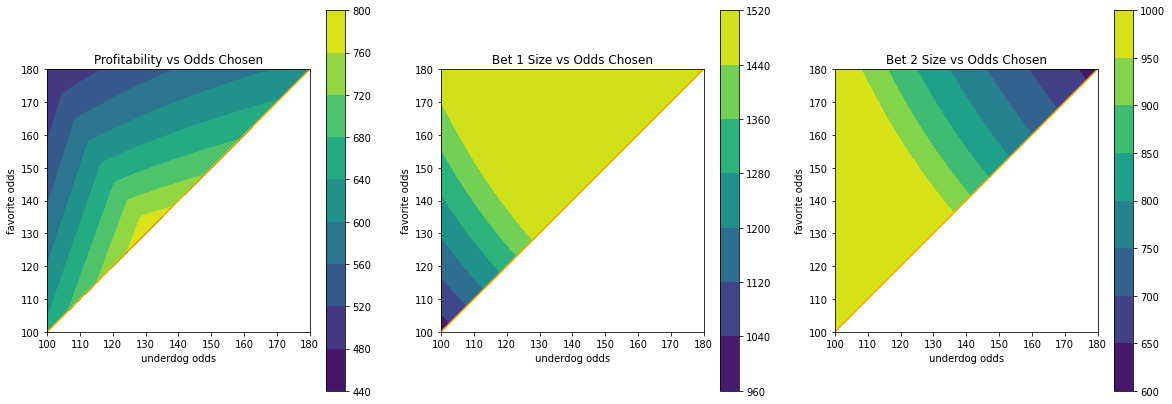

In [14]:
# free bet conversion rate
C = 0.65

odds_range = np.linspace(100.0, 180.0, 100)
  
[X, Y] = np.meshgrid(odds_range, odds_range)
X, Y = np.tril(X).clip(100), np.tril(Y).clip(100)
  
fig, [ax1, ax2, ax3] = plt.subplots(1, 3)

# option where we set bet 1 to $1000
bet1 = b2(X, Y, C)
profit1 = p1(X, Y, C, 1000, bet1)

# option where we set bet 2 to $1500
bet2 = b1(X, Y, C)
profit2 = p2(X, Y, C, bet2, 1500)

Z1 = np.minimum(profit1, profit2)
  
h1 = ax1.contourf(X, Y, Z1)

ax1.set_title('Profitability vs Odds Chosen')
ax1.set_xlabel('underdog odds')
ax1.set_ylabel('favorite odds')
fig.colorbar(h1, ax=ax1)
ax1.plot(odds_range, odds_range, color='orange')
ax1.axis('square')

h2 = ax2.contourf(X, Y, np.clip(bet1, None, 1500))

ax2.set_title('Bet 1 Size vs Odds Chosen')
ax2.set_xlabel('underdog odds')
ax2.set_ylabel('favorite odds')
fig.colorbar(h2, ax=ax2)
ax2.plot(odds_range, odds_range, color='orange')
ax2.axis('square')

h3 = ax3.contourf(X, Y, np.clip(bet2, None, 1000))

ax3.set_title('Bet 2 Size vs Odds Chosen')
ax3.set_xlabel('underdog odds')
ax3.set_ylabel('favorite odds')
fig.colorbar(h3, ax=ax3)
ax3.plot(odds_range, odds_range, color='orange')
ax3.axis('square')

fig.set_size_inches(20, 7)
plt.show()

### Maximizing the Free Bet

Given a free bet of \$f, we want to know how to maximize our winnings. We will do this by hedging our bet with a bet on another sportsbook. We will use our free bet on the underdog, and hedge our bet on the other side of the bet with a different sportsbook.

A bettor must decide at what odds to place their bet ($+a$ and $-b$) and how big their hedge (\$ $H$) should be. Note that since free bets are profitable, we will always use the maximum amount we have available, so that isn't one of the decisions a bettor should have to worry about.

In the first scenario, the free bet wins and the bettor nets

$$\text{profit} = \frac{af}{100} - H$$

In the second scenario, the hedge bet wins and the bettor nets

$$\text{profit} = \frac{100H}{b}$$

To maximize our minimum reward, we will set these two equal. Solving for $H$ yields

$$H = \frac{abf}{100(100+b)}$$

This corresponds to a guaranteed profit of

$$\text{profit} = \frac{af}{100 + b}$$

This next visualization will help you decide which odds you should pick to maximize your profit

In [4]:
def hedge(a, b, f):
    return a * b * f / (100 * (100 + b))

def free_bet_profit(a, b, f):
    return a * f / (100 + b)

In [24]:
hedge(290, 350, 1500), free_bet_profit(290, 350, 1500) - 271.5
# hedge(330, 400, 1500), free_bet_profit(330, 400, 1500) - 271.5

(3383.3333333333335, 695.1666666666666)

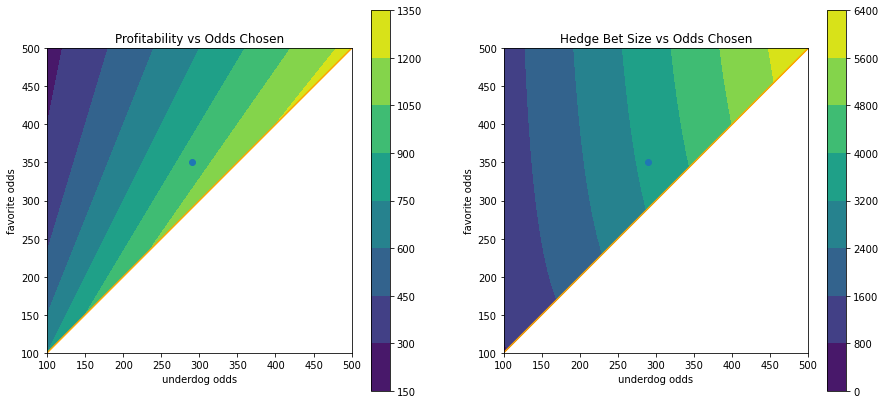

In [19]:
# free bet size
f = 1500

odds_range = np.linspace(100.0, 500.0, 100)
  
[X, Y] = np.meshgrid(odds_range, odds_range)
X, Y = np.tril(X).clip(100), np.tril(Y).clip(100)
  
fig, [ax1, ax2] = plt.subplots(1, 2)

Z1 = free_bet_profit(X, Y, f)
h1 = ax1.contourf(X, Y, Z1)
  
ax1.set_title('Profitability vs Odds Chosen')
ax1.set_xlabel('underdog odds')
ax1.set_ylabel('favorite odds')
fig.colorbar(h1, ax=ax1)
ax1.plot(odds_range, odds_range, color='orange')
ax1.axis('square')
ax1.scatter(290, 350)

Z2 = hedge(X, Y, f)
h2 = ax2.contourf(X, Y, Z2)
  
ax2.set_title('Hedge Bet Size vs Odds Chosen')
ax2.set_xlabel('underdog odds')
ax2.set_ylabel('favorite odds')
fig.colorbar(h2, ax=ax2)
ax2.plot(odds_range, odds_range, color='orange')
ax2.axis('square')
ax2.scatter(290, 350)

fig.set_size_inches(15, 7)
plt.show()

These charts show that you can make your profitability grow by taking longer and longer odds. Assuming there are no arbitrage opportunities and the odds are close to each other ($a \approx b$), profitability converges to \$ f, the size of the free bet. Some bettors might decide to give up profit because the capital requirements to hedge their bets are too big.

Keep in mind that you will have some money sitting in the other sportsbook that won its risk-free bet. Assuming you did the best non-arbitrage bet by choosing odds close to +125, -135, then if sportsbook A won, then you'd have around \$2250 in that account, whereas if sportsbook B won, you'd have around \$2600 in that account.

If you have the \$1000 free bet, \$2600 should be more than enough to secure a good portion of the profit. However, if you have the \$1500 free bet, then you'll probably want to top off your account to near \$4000 in order to secure a greater chunk of the profit.